In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("SolarPrediction.csv")

In [14]:
print(data)

         UNIXTime              Data      Time  Radiation  Temperature  \
0      1475229326    9/29/2016 0:00  23:55:26       1.21           48   
1      1475229023    9/29/2016 0:00  23:50:23       1.21           48   
2      1475228726    9/29/2016 0:00  23:45:26       1.23           48   
3      1475228421    9/29/2016 0:00  23:40:21       1.21           48   
4      1475228124    9/29/2016 0:00  23:35:24       1.17           48   
...           ...               ...       ...        ...          ...   
32681  1480587604  12-01-2016 00:00  00:20:04       1.22           44   
32682  1480587301  12-01-2016 00:00  00:15:01       1.17           44   
32683  1480587001  12-01-2016 00:00  00:10:01       1.20           44   
32684  1480586702  12-01-2016 00:00  00:05:02       1.23           44   
32685  1480586402  12-01-2016 00:00  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
0         30.46        59                  177.39  

In [15]:
#A1
data['Radiation_Class']=  pd.cut(data['Radiation'], 
                                 bins=[0, 800,  1610], labels=['Low', 'High'])

mean_low = data[data['Radiation_Class']=='Low']['Radiation'].mean()
mean_high = data[data['Radiation_Class']=='High']['Radiation'].mean()

std_low = data[data['Radiation_Class'] == 'Low']['Radiation'].std()
std_high = data[data['Radiation_Class'] == 'High']['Radiation'].std()

distance_between_means = np.linalg.norm(mean_low - mean_high)

print("Mean for 'Low' class:", mean_low)
print("Mean for 'High' class:", mean_high)
print("Standard Deviation for 'Low' class:", std_low)
print("Standard Deviation for 'High' class:", std_high)
print("Distance between mean vectors:", distance_between_means)

Mean for 'Low' class: 130.13981410625402
Mean for 'High' class: 928.213996194101
Standard Deviation for 'Low' class: 219.29447652789932
Standard Deviation for 'High' class: 93.19044668549245
Distance between mean vectors: 798.074182087847


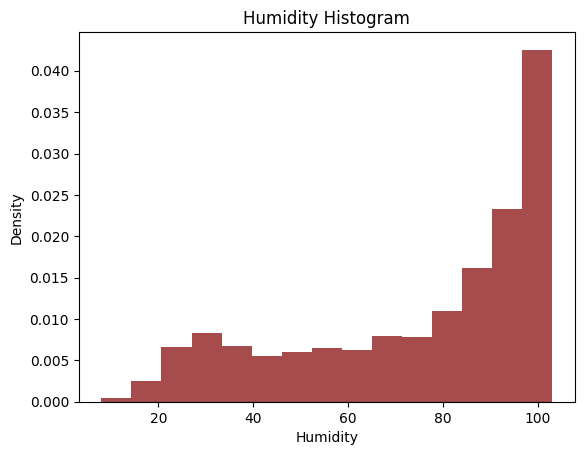

Mean Humidity: 75.01630667564095
Variance Humidity: 675.4707920376273


In [16]:
#A2
humidity_data = data['Humidity']

hist, bins, _ = plt.hist(humidity_data, bins=15, density=True, alpha=0.7, color='maroon')

mean_humidity = np.mean(humidity_data)
variance_humidity = np.var(humidity_data)

plt.xlabel('Humidity')
plt.ylabel('Density')
plt.title('Humidity Histogram')

plt.show()

print("Mean Humidity:", mean_humidity)
print("Variance Humidity:", variance_humidity)


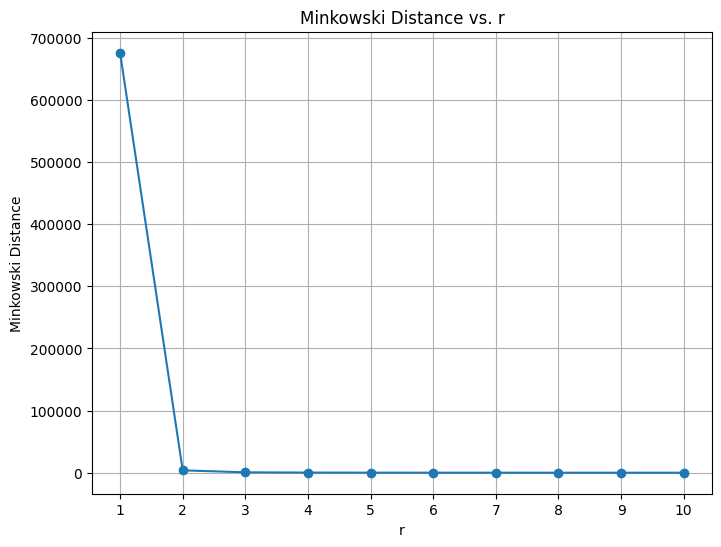

In [17]:
#A3
pressure_data = data['Pressure']
temperature_data = data['Temperature']

r_values = np.arange(1, 11)  

distances = []

for r in r_values:
    distance = np.power(np.abs(pressure_data - temperature_data), r).sum() ** (1 / r)
    distances.append(distance)

plt.figure(figsize=(8, 6))
plt.plot(r_values, distances, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.xticks(r_values)
plt.show()

In [18]:
#A4
from sklearn.model_selection import train_test_split

X= data.loc[:,"Temperature":"Speed"]
y= data["Radiation_Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)




In [19]:
#A5
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=3) 
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [20]:
#A6
k_3_score=neigh.score(X_test, y_test)
print(k_3_score)

0.9486049926578561


In [26]:
#A7
print(neigh.predict([[62,30.43,	53,65.07,7.87]]))

['High']


c:\Users\Win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


c:\Users\Win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


['High']
Both predictions are correct with accuracy score: k=1: 1.0 and k=3: 0.9486049926578561


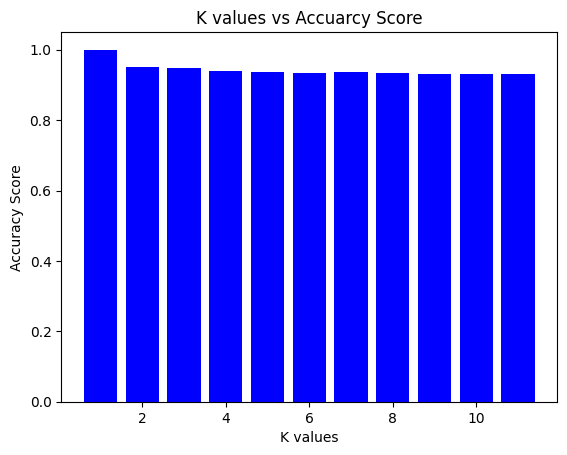

In [22]:
#A8
neigh = KNeighborsClassifier(n_neighbors=1) 
neigh.fit(X, y)
k_1_score=neigh.score(X_test, y_test)
print(neigh.predict([[62,30.43,	53,65.07,7.87]]))
print(f'Both predictions are correct with accuracy score: k=1: {k_1_score} and k=3: {k_3_score}')

x_axis= np.arange(1,12)
y_axis=[]

for i in range(1,12):
    neigh = KNeighborsClassifier(n_neighbors=i) 
    neigh.fit(X, y)
    y_axis.append(neigh.score(X_test, y_test))

plt.bar(x_axis,y_axis,color='blue')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('K values vs Accuarcy Score')
plt.show()

CF (train): [[ 1566   799]
 [  450 21699]]
CF (test): [[ 510  278]
 [ 142 7242]]


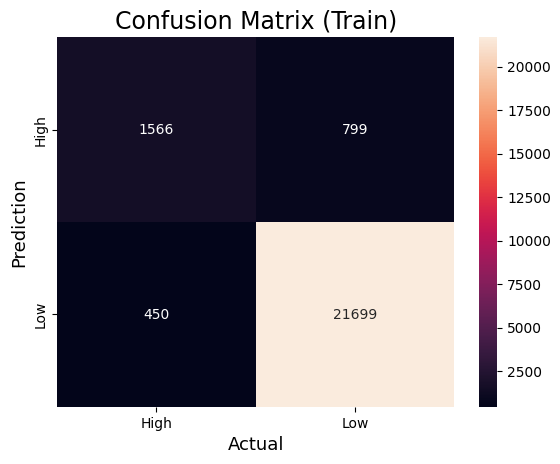

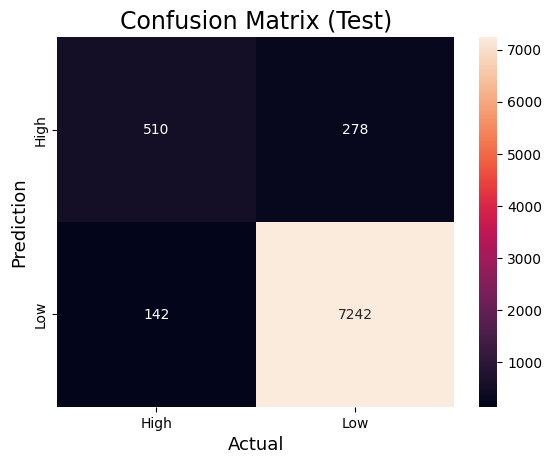

precision (train): 0.7767857142857143
recall (train): 0.6621564482029598
f1_score (train): 0.7149052727687744

precision (test): 0.7822085889570553
recall (test): 0.6472081218274112
f1_score (test): 0.7083333333333334
Model is regular fit 😊


In [28]:
#A9
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

neigh = KNeighborsClassifier(n_neighbors=3) 
neigh.fit(X, y)

y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred, labels=['High', 'Low'])
confusion_matrix_test = confusion_matrix(y_test, y_test_pred, labels=['High', 'Low'])
print(f'CF (train): {confusion_matrix_train}')
print(f'CF (test): {confusion_matrix_test}')

sns.heatmap(confusion_matrix_train,
            annot=True,
            fmt='g',
            xticklabels=['High','Low'],
            yticklabels=['High','Low'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix (Train)',fontsize=17)
plt.show()
sns.heatmap(confusion_matrix_test,
            annot=True,
            fmt='g',
            xticklabels=['High','Low'],
            yticklabels=['High','Low'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix (Test)',fontsize=17)
plt.show()
precision_train = precision_score(y_train, y_train_pred, pos_label='High')
recall_train = recall_score(y_train, y_train_pred, pos_label='High')
f1_score_train = f1_score(y_train, y_train_pred, pos_label='High')

print(f'precision (train): {precision_train}')
print(f'recall (train): {recall_train}')
print(f'f1_score (train): {f1_score_train}\n')

precision_test = precision_score(y_test, y_test_pred, pos_label='High')
recall_test = recall_score(y_test, y_test_pred, pos_label='High')
f1_score_test = f1_score(y_test, y_test_pred, pos_label='High')

print(f'precision (test): {precision_test}')
print(f'recall (test): {recall_test}')
print(f'f1_score (test): {f1_score_test}')

print("\nModel is regular fit 😊")